In [ ]:
!pip install scikit-learn

In [1]:
import sklearn as skl
from sklearn import linear_model
# Modelo de entrenamiento
lm = linear_model.LinearRegression()

In [2]:
# Importamos el dataset
import sklearn.datasets
import pandas as pd
iris = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

iris.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']

iris.sample(10)
dataset = sklearn.datasets.load_iris()

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

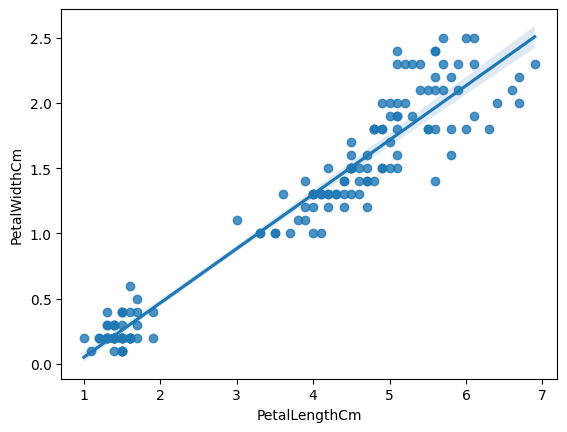

In [3]:
import seaborn as sns
%matplotlib inline
# A través del dibujo, puede hacer una observación intuitiva sobre la relación lineal de los datos
## El método regplot de seaborn genera automaticamente un regresión lineal para los datos
sns.regplot(x='PetalLengthCm',y='PetalWidthCm',data=iris)

In [4]:
from sklearn.model_selection import train_test_split
# Renombramos los valores para que X sean los atributos e Y sean las respuestas del sistema
X = dataset.data
y = dataset.target
# Realizamos la partición de nuestro dataset en un conjunto de entrenamiento y otro de test (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
features=['PetalLengthCm']
X=iris[features]
y=iris['PetalWidthCm']
print(X.shape,y.shape)

# Agregue dos características, X tendrá una dimensión más
features=['PetalLengthCm','SepalLengthCm']



(150, 1) (150,)


In [6]:
#Utiliza X, y para entrenar a la modelo
model = lm.fit(X,y)
print(model.intercept_,model.coef_)
#De los resultados de la impresión puede obtener la 
# intersección y el coeficiente del modelo de regresión

-0.3665140452167275 [0.41641913]


In [13]:
from sklearn.model_selection import cross_val_score
# Obtenga el error de 5 verificaciones cruzadas. 
# Tenga en cuenta que cross_val_score() está precedido
#por un signo negativo, y se obtiene el error de valor
#absoluto promedio de cada modelo de regresión

scores = -cross_val_score(lm, X, y, cv = 8, scoring = 'neg_mean_absolute_error')
print(scores)
# Promedio, como resultado del error

import numpy as np
print(np.mean(scores))

# Intente modificar los parámetros de puntuación para obtener MSE
# Intente agregar y eliminar variables, ¿qué modelo es 
# mejor para la predicción de PetalWidthCm? ¿Qué
# variables son útiles para predecir PetalWidthCm?

[0.07077803 0.10956797 0.08516918 0.15340394 0.1099875  0.19849059
 0.27634307 0.33061028]
0.16679382086720848


In [8]:
print((1 - np.mean(scores))*100)

83.48942489958857
